In [72]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [73]:
df=pd.read_csv("play.csv")
df

,Weather,Temperature,Play
0,Sunny,Hot,No
1,Sunny,Mild,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Sunny,Cool,Yes


In [74]:
le_weather=LabelEncoder()
le_temp=LabelEncoder()
le_play=LabelEncoder()

In [75]:
df['Weather']=le_weather.fit_transform(df['Weather'])
df['Temperature']=le_temp.fit_transform(df['Temperature'])
df['Play']=le_play.fit_transform(df['Play'])

In [76]:
df

,Weather,Temperature,Play
0,2,1,0
1,2,2,0
2,0,1,1
3,1,2,1
4,1,0,1
5,2,0,1


In [77]:
input=df[['Weather','Temperature']]
target=df['Play']

In [78]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(input,target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
rf.predict([[0,0]])

array([1])

In [80]:
rf.score(input,target)

1.0

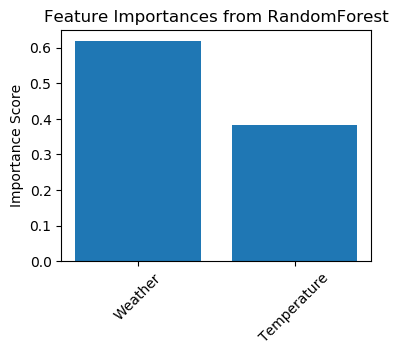

In [81]:
i=rf.feature_importances_
plt.figure(figsize=(4,3))
plt.bar(range(len(i)),i,tick_label=input.columns)
plt.xticks(rotation=45)
plt.title("Feature Importances from RandomForest")
plt.ylabel("Importance Score")
plt.show()

In [82]:
#confusion matrix
yp=rf.predict(input)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(target,yp)
cm

array([[2, 0],
       [0, 4]], dtype=int64)

Text(20.72222222222222, 0.5, 'Truth')

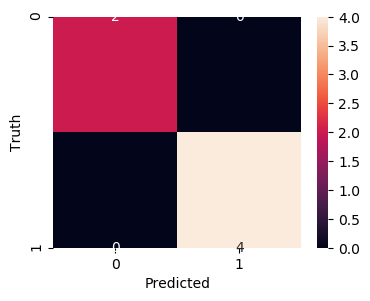

In [83]:
import seaborn as sn
plt.figure(figsize=(4,3))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")